## Import & Load

In [ ]:
import os
root = os.path.abspath(os.path.dirname('.'))
data_path = os.path.join(root, "jeju_data_ver1")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/MALGUNSL.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
get_fontprop = lambda sz : fm.FontProperties(fname=font_path, size=sz)

In [ ]:
csv_path = os.path.join(data_path, "201901-202003.csv")
df_original = pd.read_csv(csv_path)

In [ ]:
# Remove columns that contain null
df_original = df_original.drop(["CARD_CCG_NM", "HOM_CCG_NM"], axis=1)

In [ ]:
print(df_original.columns)
display(df_original.head())

In [ ]:
# TODO; CNT

df_original = df_original.loc[df_original["AMT"] / df_original["CNT"] >= 500, :]
df_original["CNT2"] = np.floor((df_original["CSTMR_CNT"] + df_original["CNT"]) / 2).astype(np.int)
display(df_original.head(10))

In [ ]:
# catch = ["REG_YYMM", "CARD_SIDO_NM", "STD_CLSS_NM", "AGE", "SEX_CTGO_CD", "FLC", "CSTMR_CNT", "AMT"]
catch = ["REG_YYMM", "CARD_SIDO_NM", "STD_CLSS_NM", "AGE", "SEX_CTGO_CD", "FLC", "CNT2", "AMT"]
group_by = ["REG_YYMM", "CARD_SIDO_NM", "STD_CLSS_NM", "AGE", "SEX_CTGO_CD", "FLC"]
df_groupby_sum = df_original[catch].groupby(group_by).sum().reset_index()
df_groupby_sum.head()

In [ ]:
df_groupby_sum = df_groupby_sum.rename(columns={"CNT2": "CSTMR_CNT"})
display(df_groupby_sum.head())

In [ ]:
md1_pivot = df_groupby_sum.pivot_table(index=["CARD_SIDO_NM", "STD_CLSS_NM", "REG_YYMM"], values=["AMT", "CSTMR_CNT"], aggfunc=sum)
md1_pivot["AMT_PER_CSTMR"] = md1_pivot["AMT"] / md1_pivot["CSTMR_CNT"]
md1_pivot = md1_pivot.reset_index()

In [ ]:
display(md1_pivot.head())

In [ ]:
yymm = md1_pivot["REG_YYMM"].unique()
def subplot(df, axs, target_sido, target_category):
    ax = axs[0]
    df_tmp = df.loc[(df["CARD_SIDO_NM"] == target_sido) & (df["STD_CLSS_NM"] == target_category), :]
    ax.bar(range(len(yymm)), df_tmp["CSTMR_CNT"], label="CNT", width=0.5, color="orange")
    
    ax.set_xticks(range(len(yymm)))
    ax.set_xticklabels(yymm, rotation='vertical')
    ax.set_ylabel("CSTMR CNT", color="orange")
    ax.set_title(f"{target_sido} - {target_category} (AMT_PER_CSTMR)", fontproperties=get_fontprop(10))
    ax.legend()
    
    ax = axs[1]
    ax.plot(df_tmp["AMT"].fillna(0.0), label="AMT")
    ax.set_ylim(bottom=0.0)
    ax.set_xticks(range(len(yymm)))
    ax.set_xticklabels(yymm, rotation='vertical')
    ax.set_ylabel("AMT")
    ax.set_title(f"{target_sido} - {target_category} (AMT)", fontproperties=get_fontprop(10))
    
    ax2 = ax.twinx()
    ax2.plot(df_tmp["AMT_PER_CSTMR"].fillna(0.0), color='green', label="AMT PER CSTMR")
    ax2.set_ylabel("AMT PER CSTMR", color="green")
    ax2.set_ylim(bottom=0.0)
    ax.legend()
    ax2.legend()

In [ ]:
def plot_one_sido(sido):
    category = md1_pivot["STD_CLSS_NM"].unique()
    n_col = len(category)

    fig, axs = plt.subplots(n_col, 2, figsize=(18, 6 * n_col), gridspec_kw=dict(wspace=0.3, hspace=0.3))
    for j, c in enumerate(category):
        try:
            subplot(md1_pivot, axs[j], sido, c)
        except:
            pass

In [ ]:
plot_one_sido("강원")

In [ ]:
plot_one_sido("경기")

In [ ]:
yymm = md1_pivot["REG_YYMM"].unique()
def subplot2(df, axs, target_sido, target_category):
    ax = axs[0]
    df_tmp = df.loc[(df["CARD_SIDO_NM"] == target_sido) & (df["STD_CLSS_NM"] == target_category), :]
    
    ax.bar(range(len(yymm)), (df_tmp["CSTMR_CNT"] - df_tmp["CSTMR_CNT"].mean()) / df_tmp["CSTMR_CNT"].std(), label="CNT", width=0.5, color="orange")
    
    ax.set_xticks(range(len(yymm)))
    ax.set_xticklabels(yymm, rotation='vertical')
    ax.set_ylabel("CSTMR CNT", color="orange")
    ax.set_title(f"{target_sido} - {target_category} (AMT_PER_CSTMR)", fontproperties=get_fontprop(10))
    ax.legend()
    
    ax = axs[1]
    ax.plot(df_tmp["AMT"].fillna(0.0), label="AMT")
    ax.set_ylim(bottom=0.0)
    ax.set_xticks(range(len(yymm)))
    ax.set_xticklabels(yymm, rotation='vertical')
    ax.set_ylabel("AMT")
    ax.set_title(f"{target_sido} - {target_category} (AMT)", fontproperties=get_fontprop(10))
    
    ax2 = ax.twinx()
    ax2.plot(df_tmp["AMT_PER_CSTMR"].fillna(0.0), color='green', label="AMT PER CSTMR")
    ax2.set_ylabel("AMT PER CSTMR", color="green")
    ax2.set_ylim(bottom=0.0)
    ax.legend()
    ax2.legend()

In [ ]:
def plot_one_clss(clss):
    sido = md1_pivot["CARD_SIDO_NM"].unique()
    n_col = len(sido)

    fig, axs = plt.subplots(n_col, 2, figsize=(18, 6 * n_col), gridspec_kw=dict(wspace=0.3, hspace=0.3))
    for j, s in enumerate(sido):
        try:
            subplot2(md1_pivot, axs[j], s, clss)
        except:
            pass

In [ ]:
plot_one_clss("골프장 운영업")

## Correlation

In [30]:
df_groupby_sum.head()

REG_YYMM CARD_SIDO_NM STD_CLSS_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0    201901           강원  건강보조식품 소매업  20s            1    1          4   
1    201901           강원  건강보조식품 소매업  30s            1    2         43   
2    201901           강원  건강보조식품 소매업  30s            2    2         90   
3    201901           강원  건강보조식품 소매업  40s            1    2          3   
4    201901           강원  건강보조식품 소매업  40s            1    3         55   

       AMT  
0   311200  
1  5169295  
2  8618550  
3   454420  
4  6441165

In [43]:
md2_pivot = df_groupby_sum.pivot_table(index=["CARD_SIDO_NM", "STD_CLSS_NM", "REG_YYMM"], values=["AMT", "CSTMR_CNT"], aggfunc=sum)
md2_pivot = md2_pivot.reset_index()

In [44]:
display(md2_pivot.head())

CARD_SIDO_NM STD_CLSS_NM  REG_YYMM        AMT  CSTMR_CNT
0           강원  건강보조식품 소매업    201901  148354746       1084
1           강원  건강보조식품 소매업    201902  146715871       1120
2           강원  건강보조식품 소매업    201903  109439025        973
3           강원  건강보조식품 소매업    201904  106548473        991
4           강원  건강보조식품 소매업    201905  148115738       1188

In [47]:
md2_pivot = md2_pivot.pivot_table(index="REG_YYMM", values="AMT", columns=["CARD_SIDO_NM", "STD_CLSS_NM"])

In [48]:
md2_pivot.head()

CARD_SIDO_NM           강원                                                \
STD_CLSS_NM    건강보조식품 소매업       골프장 운영업   과실 및 채소 소매업 관광 민예품 및 선물용품 소매업   
REG_YYMM                                                                  
201901        148354746.0  1.229200e+09  1.286979e+09        30656770.0   
201902        146715871.0  1.152241e+09  1.116266e+09        22921149.0   
201903        109439025.0  2.760497e+09  9.392280e+08        25023190.0   
201904        106548473.0  3.964893e+09  8.276834e+08        17905610.0   
201905        148115738.0  5.493932e+09  1.021473e+09        40582340.0   

CARD_SIDO_NM                                                                  \
STD_CLSS_NM  그외 기타 분류안된 오락관련 서비스업 그외 기타 스포츠시설 운영업 그외 기타 종합 소매업  기타 대형 종합 소매업   
REG_YYMM                                                                       
201901                        NaN      13101500.0  533330540.0  8.442325e+09   
201902                        NaN       7139500.0  516135590.0  7.852364e+09   
201903                        NaN       6817720.0  405132850.0  7.991631e+09   
201904                        NaN       5904100.0  433801770.0  7.409552e+09   
201905                   177000.0       7298000.0  440361900.0  8.274437e+09   

CARD_SIDO_NM                             ...            충북               \
STD_CLSS_NM  기타 수상오락 서비스업   기타 외국식 음식점업  ...       중식 음식점업   차량용 가스 충전업   
REG_YYMM                                 ...                              
201901          4224000.0  1.164632e+09  ...  1.377335e+09  792936259.0   
201902          3567200.0  9.456706e+08  ...  1.340349e+09  691303245.0   
201903          2557000.0  1.144721e+09  ...  1.522395e+09  744405831.0   
201904          1507000.0  1.084116e+09  ...  1.416192e+09  676034137.0   
201905          2495500.0  1.095992e+09  ...  1.492219e+09  647700689.0   

CARD_SIDO_NM                                                              \
STD_CLSS_NM    차량용 주유소 운영업       체인화 편의점    택시 운송업 피자 햄버거 샌드위치 및 유사 음식점업   
REG_YYMM                                                                   
201901        2.019654e+10  7.102759e+09   96000.0          1.419836e+09   
201902        1.770311e+10  6.462760e+09   68020.0          1.315558e+09   
201903        2.219939e+10  7.934523e+09  103300.0          1.441132e+09   
201904        2.246487e+10  7.988856e+09   44700.0          1.428269e+09   
201905        2.522725e+10  8.977701e+09   74700.0          1.562180e+09   

CARD_SIDO_NM                                                       
STD_CLSS_NM        한식 음식점업         호텔업 화장품 및 방향제 소매업     휴양콘도 운영업  
REG_YYMM                                                           
201901        2.159803e+10  34662718.0   728722041.0  198574855.0  
201902        1.949968e+10  33959349.0   655288626.0  165872181.0  
201903        2.295248e+10  36030010.0   729328422.0  107431443.0  
201904        2.216287e+10  40510930.0   687254347.0  101930350.0  
201905        2.443094e+10  44408090.0   713497408.0  178834870.0  

[5 rows x 650 columns]

In [49]:
md2_pivot = md2_pivot.transpose().dropna().transpose()
md2_pivot.head()

CARD_SIDO_NM           강원                                                \
STD_CLSS_NM    건강보조식품 소매업       골프장 운영업   과실 및 채소 소매업 관광 민예품 및 선물용품 소매업   
REG_YYMM                                                                  
201901        148354746.0  1.229200e+09  1.286979e+09        30656770.0   
201902        146715871.0  1.152241e+09  1.116266e+09        22921149.0   
201903        109439025.0  2.760497e+09  9.392280e+08        25023190.0   
201904        106548473.0  3.964893e+09  8.276834e+08        17905610.0   
201905        148115738.0  5.493932e+09  1.021473e+09        40582340.0   

CARD_SIDO_NM                                                          \
STD_CLSS_NM  그외 기타 스포츠시설 운영업 그외 기타 종합 소매업  기타 대형 종합 소매업 기타 수상오락 서비스업   
REG_YYMM                                                               
201901            13101500.0  533330540.0  8.442325e+09    4224000.0   
201902             7139500.0  516135590.0  7.852364e+09    3567200.0   
201903             6817720.0  405132850.0  7.991631e+09    2557000.0   
201904             5904100.0  433801770.0  7.409552e+09    1507000.0   
201905             7298000.0  440361900.0  8.274437e+09    2495500.0   

CARD_SIDO_NM                             ...            충북               \
STD_CLSS_NM    기타 외국식 음식점업       기타 주점업  ...       중식 음식점업   차량용 가스 충전업   
REG_YYMM                                 ...                              
201901        1.164632e+09  326489689.0  ...  1.377335e+09  792936259.0   
201902        9.456706e+08  277843000.0  ...  1.340349e+09  691303245.0   
201903        1.144721e+09  314738300.0  ...  1.522395e+09  744405831.0   
201904        1.084116e+09  295860923.0  ...  1.416192e+09  676034137.0   
201905        1.095992e+09  311790510.0  ...  1.492219e+09  647700689.0   

CARD_SIDO_NM                                                              \
STD_CLSS_NM    차량용 주유소 운영업       체인화 편의점    택시 운송업 피자 햄버거 샌드위치 및 유사 음식점업   
REG_YYMM                                                                   
201901        2.019654e+10  7.102759e+09   96000.0          1.419836e+09   
201902        1.770311e+10  6.462760e+09   68020.0          1.315558e+09   
201903        2.219939e+10  7.934523e+09  103300.0          1.441132e+09   
201904        2.246487e+10  7.988856e+09   44700.0          1.428269e+09   
201905        2.522725e+10  8.977701e+09   74700.0          1.562180e+09   

CARD_SIDO_NM                                                       
STD_CLSS_NM        한식 음식점업         호텔업 화장품 및 방향제 소매업     휴양콘도 운영업  
REG_YYMM                                                           
201901        2.159803e+10  34662718.0   728722041.0  198574855.0  
201902        1.949968e+10  33959349.0   655288626.0  165872181.0  
201903        2.295248e+10  36030010.0   729328422.0  107431443.0  
201904        2.216287e+10  40510930.0   687254347.0  101930350.0  
201905        2.443094e+10  44408090.0   713497408.0  178834870.0  

[5 rows x 597 columns]

In [74]:
md2_pivot.loc[:, (slice(None), "골프장 운영업")]

CARD_SIDO_NM            강원            경기            경남            경북  \
STD_CLSS_NM        골프장 운영업       골프장 운영업       골프장 운영업       골프장 운영업   
REG_YYMM                                                               
201901        1.229200e+09  1.471697e+09  2.720329e+09  1.829792e+09   
201902        1.152241e+09  2.870129e+09  3.146940e+09  2.694261e+09   
201903        2.760497e+09  1.485536e+10  4.831385e+09  5.295067e+09   
201904        3.964893e+09  1.890336e+10  5.471565e+09  6.033763e+09   
201905        5.493932e+09  2.204870e+10  6.256779e+09  7.048495e+09   
201906        5.663770e+09  2.188702e+10  6.265563e+09  6.844289e+09   
201907        5.032904e+09  1.821197e+10  5.339814e+09  6.225985e+09   
201908        5.800083e+09  1.533153e+10  5.019993e+09  5.545643e+09   
201909        4.158458e+09  1.763022e+10  4.995312e+09  5.496305e+09   
201910        5.652093e+09  2.136844e+10  6.047875e+09  6.637822e+09   
201911        4.017470e+09  1.688235e+10  5.672188e+09  5.909092e+09   
201912        1.239989e+09  4.321382e+09  4.291676e+09  3.607561e+09   
202001        1.241102e+09  2.212421e+09  2.671362e+09  1.899482e+09   
202002        9.684565e+08  3.921881e+09  3.370386e+09  2.770635e+09   
202003        2.915798e+09  1.428287e+10  4.138688e+09  3.887447e+09   

CARD_SIDO_NM           광주           대구           대전            부산  \
STD_CLSS_NM       골프장 운영업      골프장 운영업      골프장 운영업       골프장 운영업   
REG_YYMM                                                            
201901         88324000.0   76561290.0   76307250.0  7.393546e+08   
201902        101867800.0  118770200.0   97682200.0  8.626298e+08   
201903        204945500.0  268961445.0  241778140.0  1.382102e+09   
201904        217185000.0  297683460.0  285665369.0  1.484813e+09   
201905        309158400.0  307473295.0  355114400.0  1.736689e+09   
201906        319681600.0  298839410.0  340432810.0  1.744864e+09   
201907        233552600.0  294964840.0  290346770.0  1.595165e+09   
201908        217559500.0  269059790.0  252916400.0  1.358084e+09   
201909        225506000.0  245406360.0  259030100.0  1.411938e+09   
201910        287362000.0  274109405.0  325739513.0  1.548766e+09   
201911        248006000.0  243035660.0  295422060.0  1.700032e+09   
201912        151518000.0  143789670.0  157464550.0  1.202647e+09   
202001         82438500.0   69715260.0   92976000.0  7.180524e+08   
202002        108047500.0   87740470.0  113022150.0  1.010117e+09   
202003        200903800.0  124715010.0  229080825.0  1.291404e+09   

CARD_SIDO_NM           서울           세종           울산            인천  \
STD_CLSS_NM       골프장 운영업      골프장 운영업      골프장 운영업       골프장 운영업   
REG_YYMM                                                            
201901         91167430.0   56418400.0  349865150.0  2.404578e+08   
201902        171068380.0   62793300.0  397449750.0  5.232773e+08   
201903        336247755.0  184586530.0  600065730.0  1.793984e+09   
201904        414515592.0  193434680.0  655937690.0  2.302492e+09   
201905        503988683.0  226819400.0  744447600.0  2.417172e+09   
201906        456069210.0  223552630.0  755589650.0  2.414833e+09   
201907        405059380.0  184638740.0  670267300.0  1.961420e+09   
201908        322949130.0  177260080.0  700524100.0  1.694329e+09   
201909        299468590.0  206098520.0  584841000.0  1.835745e+09   
201910        427855850.0  287705260.0  724656100.0  2.265076e+09   
201911        457277375.0  236583160.0  707739350.0  1.819630e+09   
201912        238257150.0  114946010.0  515799400.0  6.719145e+08   
202001        157811310.0   48313700.0  314993050.0  3.381222e+08   
202002        195393150.0   99103760.0  413268400.0  5.766477e+08   
202003        364764050.0  189063330.0  512781100.0  1.647333e+09   

CARD_SIDO_NM            전남            전북            제주            충남  \
STD_CLSS_NM        골프장 운영업       골프장 운영업       골프장 운영업       골프장 운영업   
REG_YYMM                                                               
2

In [138]:
def corr(sido=None, clss=None, shift=1):
    if sido is None and clss is None:
        df_tmp = md2_pivot
        title = "전체"
    elif sido is not None:
        df_tmp = md2_pivot.loc[:, sido]
        title = sido
    elif clss is not None:
        df_tmp = md2_pivot.loc[:, (slice(None), clss)]
        title = clss
    else:
        return
    
    df_tmp_np = df_tmp.to_numpy()
    
    x = df_tmp_np[:-shift, :].reshape(-1)
    lx = np.log10(x)
    y = df_tmp_np[shift:, :].reshape(-1)
    ly = np.log10(y)
    
    def _corr(x, y):
        cov = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x))
        corr = cov / (np.std(x) * np.std(y))
        return corr
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].scatter(x=x, y=y)
    ax[0].set_title(f"{title} - m{shift} corr: {_corr(x, y):.4f}", fontproperties=get_fontprop(10))
    ax[1].scatter(x=lx, y=ly)
    ax[1].set_title(f"{title} - m{shift} log10 corr: {_corr(lx, ly):.4f}", fontproperties=get_fontprop(10))
    plt.show()

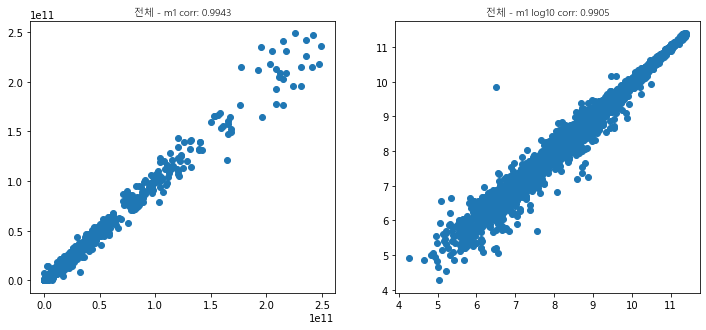

In [144]:
corr()

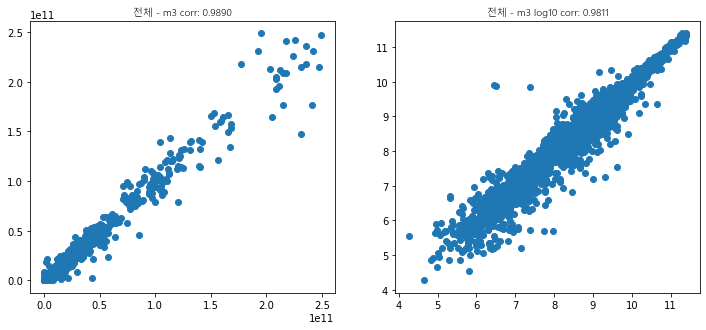

In [145]:
corr(shift=3)

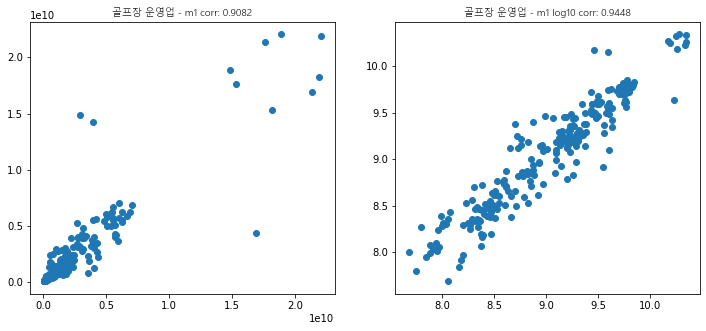

In [139]:
corr(clss="골프장 운영업")

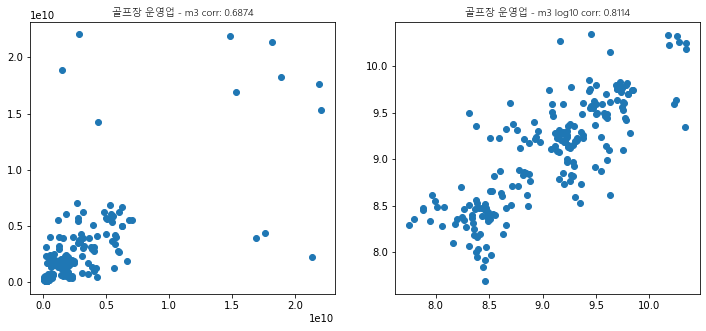

In [140]:
corr(clss="골프장 운영업", shift=3)

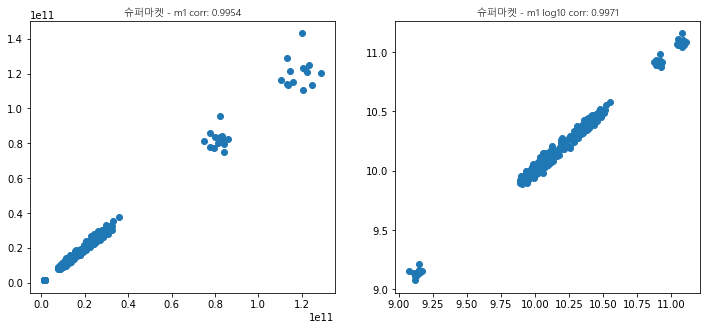

In [136]:
corr(clss="슈퍼마켓")

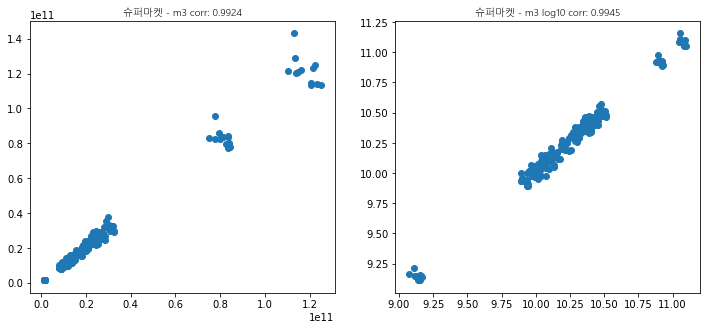

In [141]:
corr(clss="슈퍼마켓", shift=3)

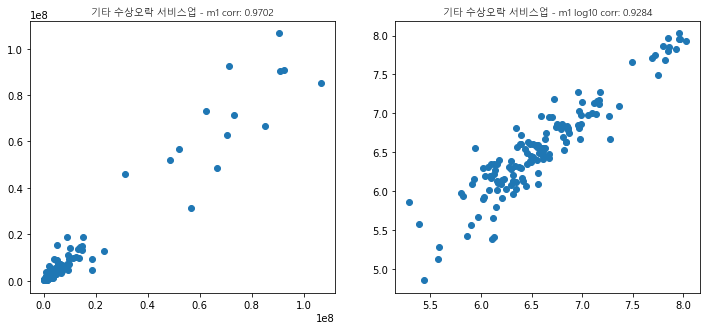

In [137]:
corr(clss="기타 수상오락 서비스업")

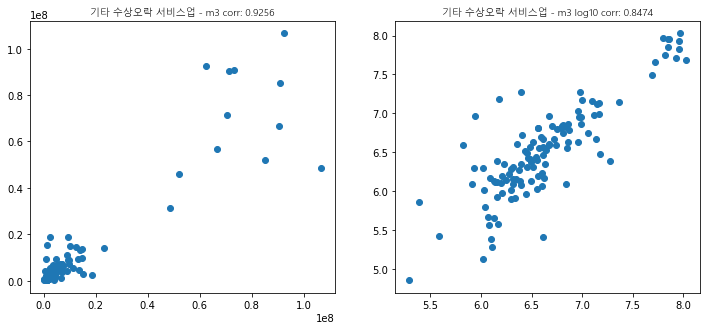

In [142]:
corr(clss="기타 수상오락 서비스업", shift=3)

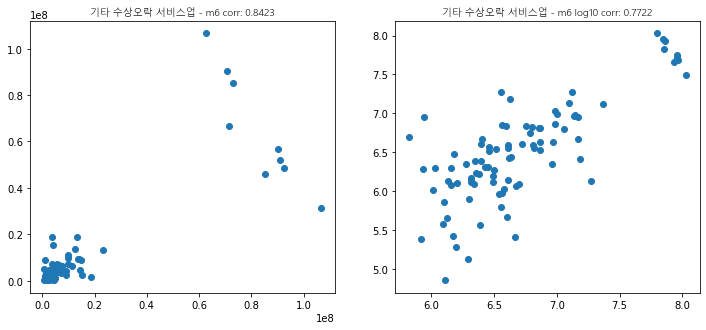

In [143]:
corr(clss="기타 수상오락 서비스업", shift=6)

1. log scale은 큰 숫자들은 모으고 작은 숫자들은 퍼트리는 효과.
2. corr는 std.로 나눠주기 때문에 숫자 크기랑 관련 없음.
3. 슈퍼마켓 같이 계절성이 없는 CLSS는 corr이 shift에 관계 없이 크게 나타나지만 계절성이 있는 CLSS는 shift에 따라 corr가 크게 달라짐
4. 전체를 같이보면 이런 경향이 묻혀버림